In [273]:
import pandas as pd
import numpy as np
import sidetable


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, f1_score

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import xgboost as xgb


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv', index_col='id')
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


# 1. EDA (Exploratory Data Analysis):

In [312]:
# Columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  float64
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  float64
 5   ps_ind_05_cat   595212 non-null  float64
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000,4.000000
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000,6.000000
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_09_bin,595212.0,0.185304,0.388544,0.000000,0.000000,0.000000,0.000000,1.000000


In [313]:
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

### 1. Write at least 3 important inferences from the data above

* There are 595212 rows in the dataset
* There are 57 columns 
* All the data points seems to be encoded already as all the column types are either int or float
* target variable has only 0 and 1 so it's a binary classification problem

### 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

In [6]:
# Target analysis
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [7]:
print((df.target.value_counts()[1] / df.target.count())*100)

3.6447517859182947


#### Ans: Target is not balances it is only 3.64% of total data

In [8]:
### Datatypes of each column
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

### 3. How many categorical features are there?

In [9]:
categorical_columns = [column for column in df.columns if '_cat' in column]
print(f'No.of Categorical Features: {len(categorical_columns)}')

No.of Categorical Features: 14


### 4. How many binary features are there? 

In [314]:
binary_columns = [column for column in df.columns if '_bin' in column]
print(f'Ans: No.of Binary Features: {len(binary_columns)}')

Ans: No.of Binary Features: 17


Most of the variables are consistent with Mean and Median except for ps_calc_02, ps_calc_02, ps_ind_15, ps_calc_10 where there is a big difference

In [12]:
continious_ordinal_columns = list(set(df.columns) - set(binary_columns) - set(categorical_columns) - set(['target']))
print(f'No.of Continuous Ordinal Features: {len(continious_ordinal_columns)}')

No.of Continuous Ordinal Features: 26


In [13]:
# Identifying interval variables
interval_ordinal = []
for col in continious_ordinal_columns:
    values = sorted(df[col].unique())
    if len(values) < 100:
        interval_ordinal.append(col)
        #print(col)
        #print(sorted(df[col].unique()))

In [14]:
print(interval_ordinal)

['ps_calc_07', 'ps_ind_01', 'ps_car_15', 'ps_car_11', 'ps_calc_08', 'ps_reg_02', 'ps_calc_02', 'ps_reg_01', 'ps_calc_04', 'ps_ind_15', 'ps_calc_11', 'ps_calc_10', 'ps_calc_03', 'ps_calc_09', 'ps_calc_13', 'ps_calc_06', 'ps_calc_12', 'ps_ind_14', 'ps_calc_01', 'ps_calc_14', 'ps_calc_05', 'ps_ind_03']


### 5. Write inferences from data on interval variables.

In [16]:
df[interval_ordinal].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_calc_07,595212.0,3.005823,1.414564,0.0,2.000000,3.000000,4.000000,9.000000
ps_ind_01,595212.0,1.900378,1.983789,0.0,0.000000,1.000000,3.000000,7.000000
ps_car_15,595212.0,3.065899,0.731366,0.0,2.828427,3.316625,3.605551,3.741657
ps_car_11,595212.0,2.346072,0.832548,-1.0,2.000000,3.000000,3.000000,3.000000
ps_calc_08,595212.0,9.225904,1.459672,2.0,8.000000,9.000000,10.000000,12.000000
ps_reg_02,595212.0,0.439184,0.404264,0.0,0.200000,0.300000,0.600000,1.800000
ps_calc_02,595212.0,0.449589,0.286893,0.0,0.200000,0.400000,0.700000,0.900000
ps_reg_01,595212.0,0.610991,0.287643,0.0,0.400000,0.700000,0.900000,0.900000
ps_calc_04,595212.0,2.372081,1.117219,0.0,2.000000,2.000000,3.000000,5.000000
ps_ind_15,595212.0,7.299922,3.546042,0.0,5.000000,7.000000,10.000000,13.000000


### Univariate Visualization

In [17]:
# Taking sample data out of total data for analysis
sample_df = df.sample(10000)

In [18]:
def count_plot(data, columns):
    width = 3
    length = len(columns)
    height = (length // width) + 1
    
    fig, axes = plt.subplots(height, width, figsize = (16, 4 * height))

    index=0

    for i in range(height):
        for j in range(width):
            if index < length:
                column_name = columns[index]
                sns.countplot(df[column_name],ax = axes[i, j], x=column_name)

                index +=1
    plt.plot()

In [19]:
def dist_plot(data, columns):
    width = 3
    length = len(columns)
    height = (length // width) + 1
    
    fig, axes = plt.subplots(height, width, figsize = (16, 4 * height))

    index=0

    for i in range(height):
        for j in range(width):
            if index < length:
                column_name = columns[index]
                sns.distplot(df[column_name],ax = axes[i, j], kde=False)

                index +=1
    plt.plot()

In [20]:
def bar_plot(data, columns):
    width = 3
    length = len(columns)
    height = (length // width) + 1
    
    fig, axes = plt.subplots(height, width, figsize = (16, 4 * height))

    index=0

    for i in range(height):
        for j in range(width):
            if index < length:
                column_name = columns[index]
                sns.barplot(x = df[column_name], y=df['target'], ax = axes[i, j])

                index +=1
    plt.plot()

### 5. Write inferences from data on interval variables.

In [21]:
continuous_variables = list(set(continious_ordinal_columns) - set(interval_ordinal))
continuous_variables

['ps_car_12', 'ps_car_13', 'ps_reg_03', 'ps_car_14']

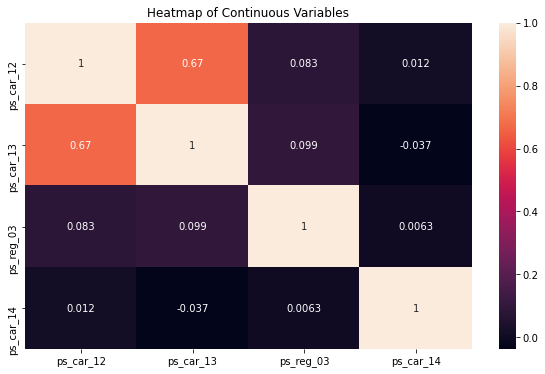

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous_variables].corr(), annot=True)
plt.title('Heatmap of Continuous Variables')
plt.show()

Ans: ps_car_12 is correlated with ps_car_12

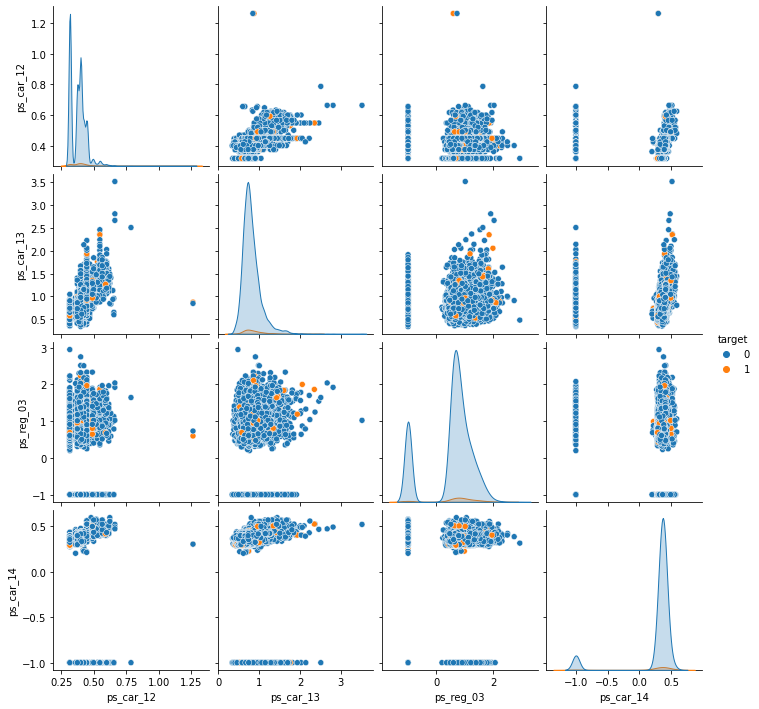

In [23]:
sns.pairplot(df[continuous_variables + ['target']].sample(10000), hue='target')
plt.show()

### 6. Write inferences from data on ordinal variables.

In [24]:
for col in categorical_columns:
    print(f'{col} vs target\n')
    print(pd.crosstab(df[col].replace(np.NaN, -1), df.target,  normalize='columns'))
    print('---------------------------------')

ps_ind_02_cat vs target

target                0         1
ps_ind_02_cat                    
-1             0.000307  0.001844
 1             0.726099  0.711164
 2             0.207247  0.217249
 3             0.047317  0.048354
 4             0.019030  0.021388
---------------------------------
ps_ind_04_cat vs target

target                0         1
ps_ind_04_cat                    
-1             0.000087  0.001521
 0             0.583929  0.556421
 1             0.415983  0.442058
---------------------------------
ps_ind_05_cat vs target

target                0         1
ps_ind_05_cat                    
-1             0.009285  0.022310
 0             0.889472  0.824237
 1             0.013816  0.018346
 2             0.006744  0.014566
 3             0.013738  0.016318
 4             0.030320  0.044021
 5             0.002736  0.003688
 6             0.033889  0.056513
---------------------------------
ps_car_01_cat vs target

target                0         1
ps_car_01_cat   

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[categorical_columns], annot=True)
plt.show()

KeyboardInterrupt: 

### 7. Write inferences from data on binary variables.

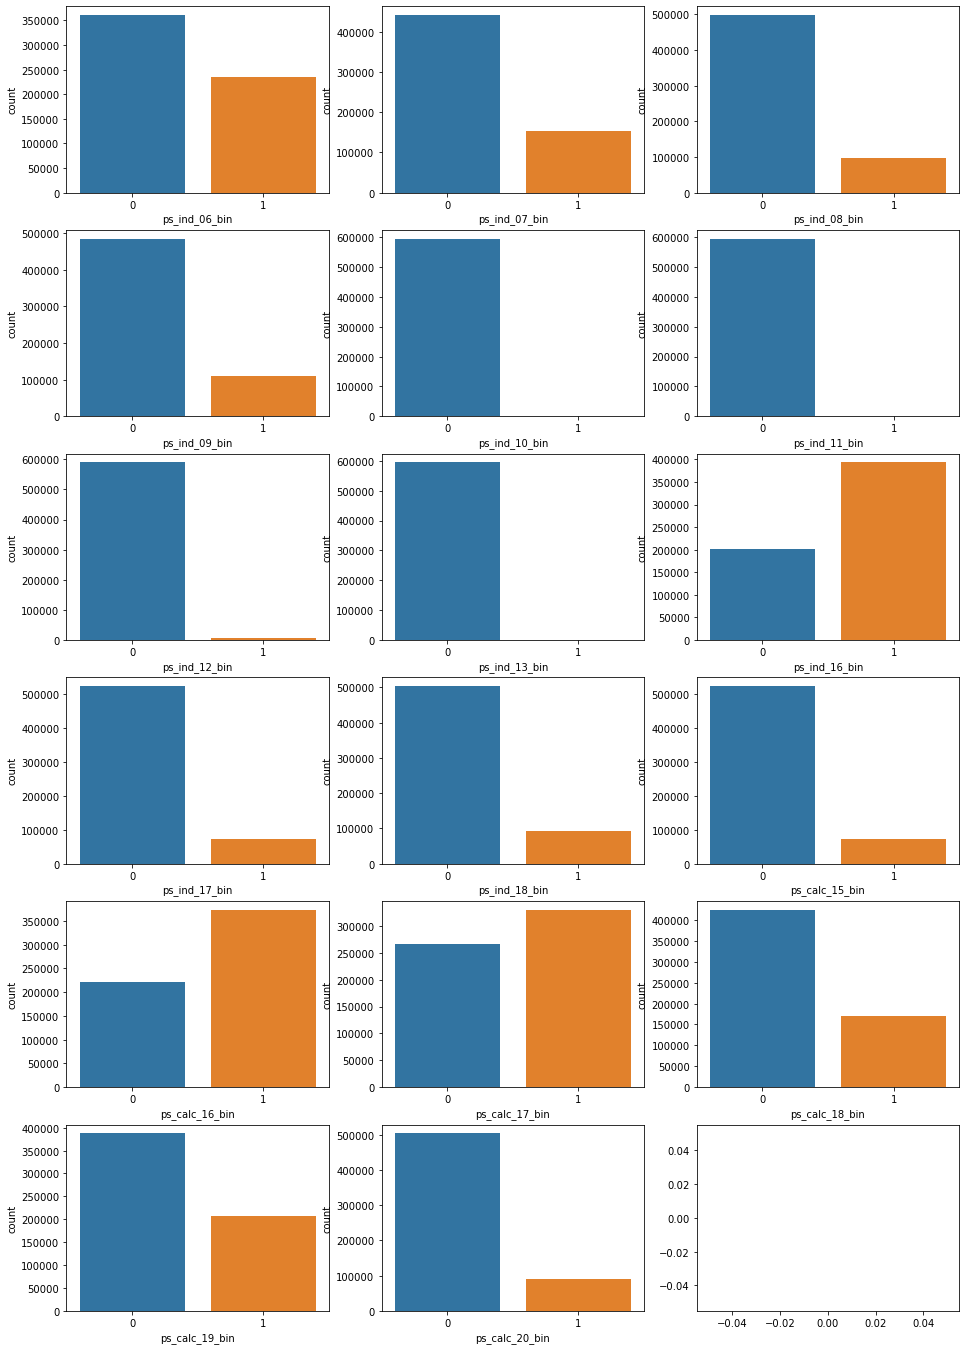

In [25]:
count_plot(df, binary_columns)

### Inference using crosstab for categorical variables

In [26]:
for col in binary_columns:
    print(f'{col} vs target\n')
    print(pd.crosstab(df[col], df.target,  normalize='columns'))
    print('---------------------------------')

ps_ind_06_bin vs target

target                0         1
ps_ind_06_bin                    
0              0.603026  0.691712
1              0.396974  0.308288
---------------------------------
ps_ind_07_bin vs target

target                0         1
ps_ind_07_bin                    
0              0.745875  0.666083
1              0.254125  0.333917
---------------------------------
ps_ind_08_bin vs target

target                0         1
ps_ind_08_bin                    
0              0.837025  0.811054
1              0.162975  0.188946
---------------------------------
ps_ind_09_bin vs target

target                0         1
ps_ind_09_bin                    
0              0.814074  0.831151
1              0.185926  0.168849
---------------------------------
ps_ind_10_bin vs target

target                0         1
ps_ind_10_bin                    
0              0.999634  0.999447
1              0.000366  0.000553
---------------------------------
ps_ind_11_bin vs target



Inference: Features of ps_ind_10_bin, ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin are most likely to make a claim          

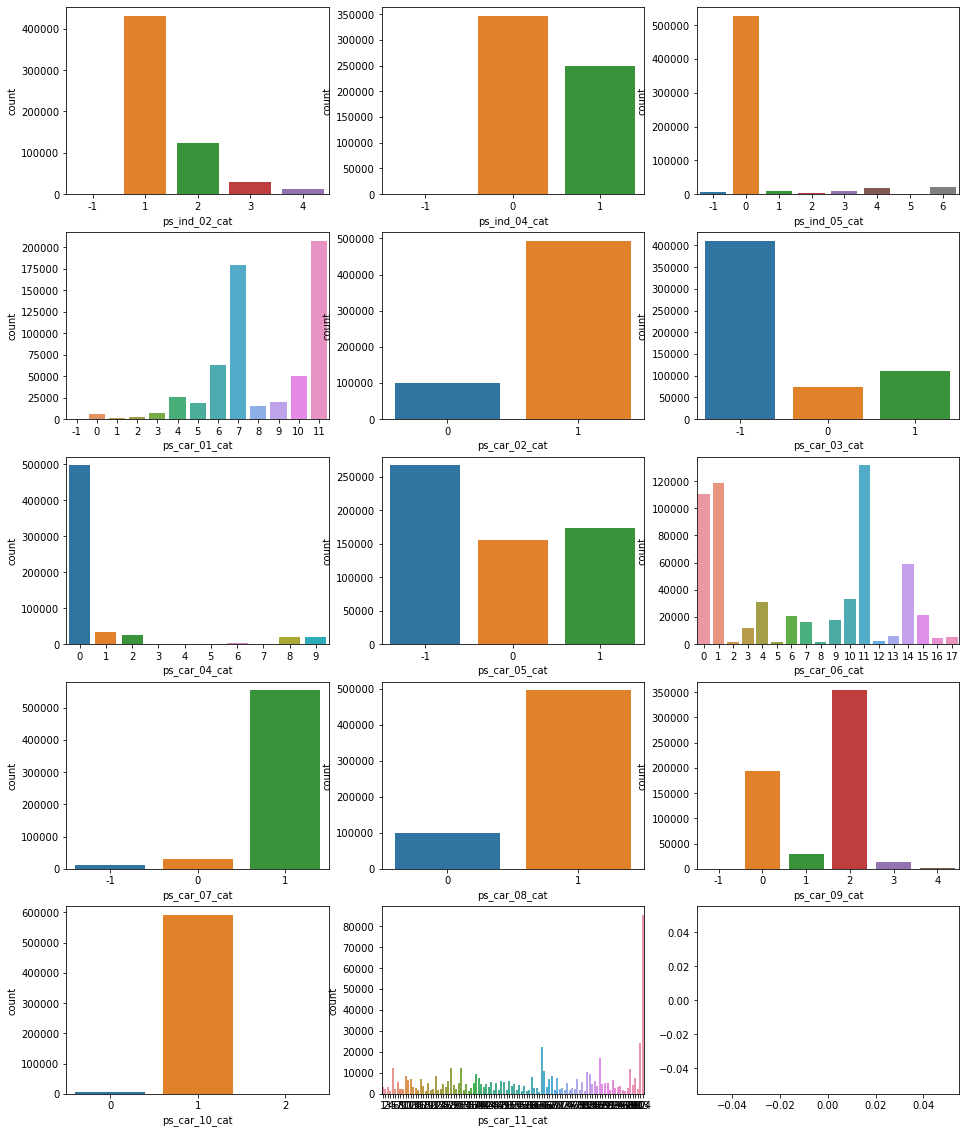

In [27]:
count_plot(df, categorical_columns)

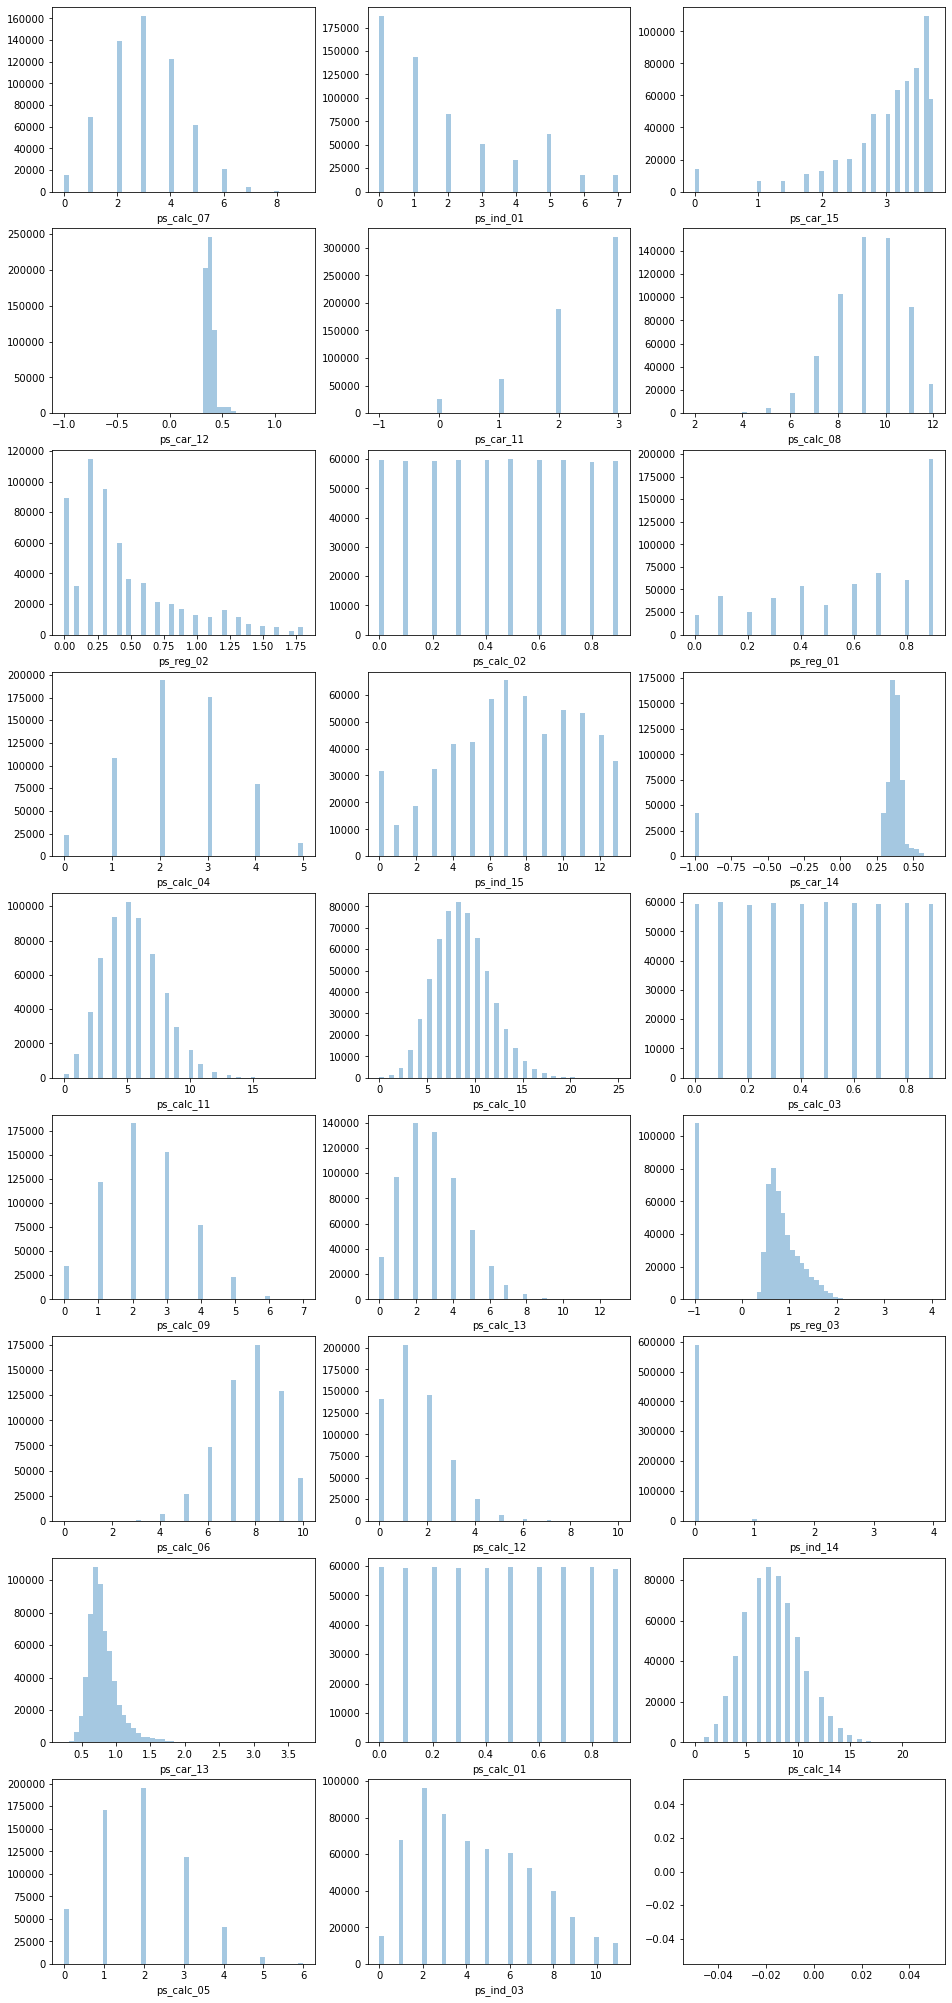

In [28]:
dist_plot(df, continious_ordinal_columns)

In [29]:
df[continious_ordinal_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_calc_07,595212.0,3.005823,1.414564,0.000000,2.000000,3.000000,4.000000,9.000000
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000,7.000000
ps_car_15,595212.0,3.065899,0.731366,0.000000,2.828427,3.316625,3.605551,3.741657
ps_car_12,595212.0,0.379945,0.058327,-1.000000,0.316228,0.374166,0.400000,1.264911
ps_car_11,595212.0,2.346072,0.832548,-1.000000,2.000000,3.000000,3.000000,3.000000
ps_calc_08,595212.0,9.225904,1.459672,2.000000,8.000000,9.000000,10.000000,12.000000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_calc_02,595212.0,0.449589,0.286893,0.000000,0.200000,0.400000,0.700000,0.900000
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_calc_04,595212.0,2.372081,1.117219,0.000000,2.000000,2.000000,3.000000,5.000000


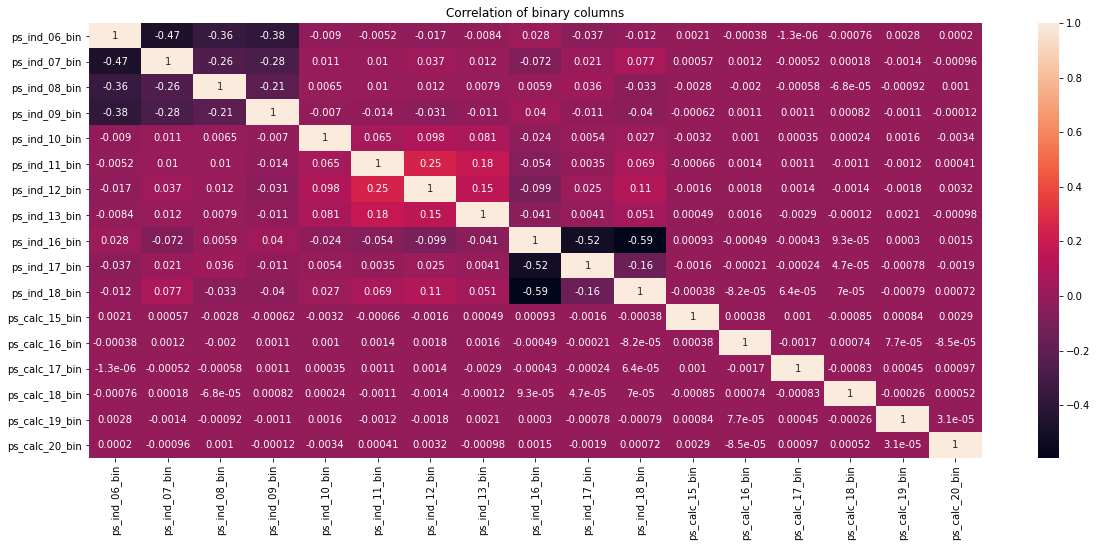

In [31]:
plt.figure(figsize=(20,8))
sns.heatmap(df[binary_columns].corr(), annot=True)
plt.title('Correlation of binary columns')
plt.show()

#### Correlation Inference
1. ps_ind_17_bin is correlated with ps_ind_16_bin
2. ps_ind_16_bin is correlated with ps_ind_18_bin

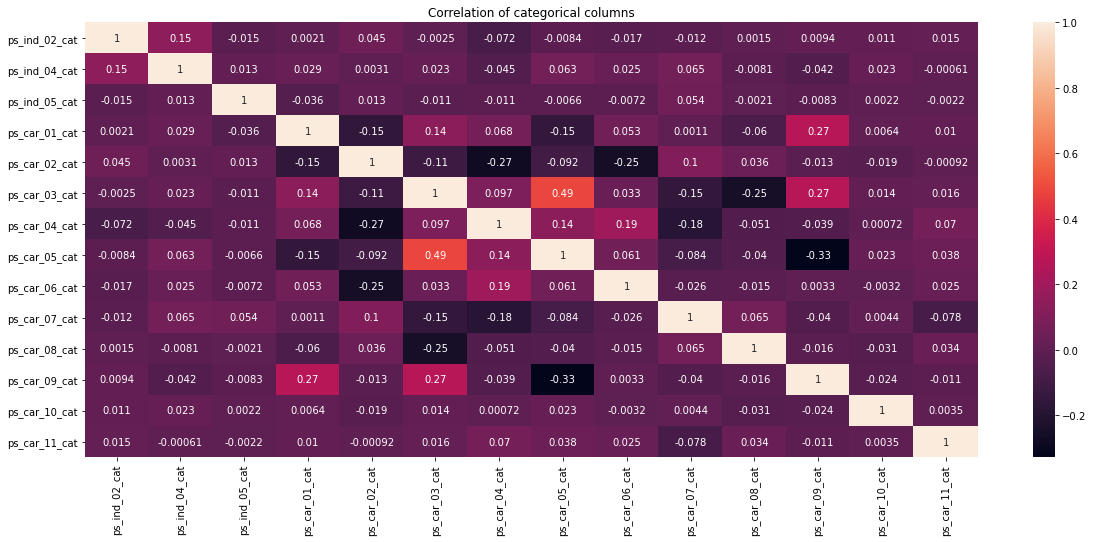

In [32]:
plt.figure(figsize=(20,8))
sns.heatmap(df[categorical_columns].corr(), annot=True)
plt.title('Correlation of categorical columns')
plt.show()

#### Correlation Inference
1. ps_car_03_cat is correlated with ps_car_05_cat


### 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

In [33]:
result = df.target.value_counts()
result

0    573518
1     21694
Name: target, dtype: int64

In [34]:
(result[1] / df.shape[0])*100

3.6447517859182947

#### Data is not proportionate, 0's are more compared to 1's

### 9. What should be the preferred way in this case to balance the data? 

In [35]:
print('We could use imblearn SMOTE technique to rebalance the dataset')

We could use imblearn to rebalance the dataset


### -1 are missing values, find and replace then with valid values

In [36]:
df = df.replace(-1, np.nan)

In [37]:
# Check for mising values
missing_data = df.stb.missing()
missing_data

,missing,total,percent
ps_car_03_cat,411231,595212,69.089837
ps_car_05_cat,266551,595212,44.782531
ps_reg_03,107772,595212,18.106490
ps_car_14,42620,595212,7.160474
ps_car_07_cat,11489,595212,1.930237
ps_ind_05_cat,5809,595212,0.975955
ps_car_09_cat,569,595212,0.095596
ps_ind_02_cat,216,595212,0.036290
ps_car_01_cat,107,595212,0.017977
ps_ind_04_cat,83,595212,0.013945


### 10. How many training records are there after achieving a balance of 12%?

In [63]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

sm = SMOTE(random_state=42, sampling_strategy = 0.12)
X, y = sm.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y)}')

Shape of X: (595212, 57)
Shape of y: (595212,)
Resamled dataset shape Counter({0: 573518, 1: 68822})


In [65]:
print(f'There are {X.shape[0]} records after resampling')

There are 642340 records after resampling


### 11. Which are the top two features in terms of missing values? 

In [38]:
print(f'Top two features in terms of missing values are {missing_data.head(2).index.values}')

Top two features in terms of missing values are ['ps_car_03_cat' 'ps_car_05_cat']


### 12. In total, how many features have missing values?

In [39]:
print(f'There are {missing_data[missing_data.missing > 0].shape[0]} features having missing values')

There are 12 features having missing values


### 13. What steps should be taken to handle the missing data? 

Ans: We could take Mean, Median, Mode, interpolation, fill with previour or next values

In [40]:
missing_strategy = {'ps_car_03_cat':'pad',
                    'ps_car_05_cat':'pad',
                    'ps_reg_03': 'interpolation',
                    'ps_car_14': 'interpolation',
                    'ps_car_07_cat': 'mode',
                    'ps_ind_05_cat':'mode', 
                    'ps_car_09_cat': 'mode',
                    'ps_ind_02_cat': 'mode', 
                    'ps_car_01_cat':'mode',
                    'ps_ind_04_cat':'mode',
                    'ps_car_11': 'mode',
                    'ps_car_12': 'mode'}

#### There are missing values

In [41]:
### Filling missing values

for key in missing_strategy:
    if missing_strategy[key] == 'mode':
        value = df[key].mode()[0]
        df[key].fillna(value, inplace=True)
        df[key].replace(np.nan, value, inplace=True)
    elif missing_strategy[key] == 'pad':
        df[key].fillna(method='pad', inplace=True)
        value = df[key].mode()[0]
        df[key].fillna(value, inplace=True)
    elif missing_strategy[key] == 'interpolation':
        df[key].interpolate(method='linear', inplace=True)

In [42]:
df.stb.missing()

,missing,total,percent
target,0,595212,0.0
ps_calc_06,0,595212,0.0
ps_car_10_cat,0,595212,0.0
ps_car_11_cat,0,595212,0.0
ps_car_11,0,595212,0.0
ps_car_12,0,595212,0.0
ps_car_13,0,595212,0.0
ps_car_14,0,595212,0.0
ps_car_15,0,595212,0.0
ps_calc_01,0,595212,0.0


#### Solved missing values

In [67]:
# Create a 30% balanced dataset for 1

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

sm = SMOTE(random_state=42, sampling_strategy = 0.3)
X, y = sm.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y)}')

df_sampled = pd.concat([X, y], axis=1)
df_sampled.head()

Shape of X: (595212, 57)
Shape of y: (595212,)
Resampled dataset shape Counter({0: 573518, 1: 172055})


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,1,5,8,0,1,1,0,0,1,0
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,1,1,9,0,1,1,0,1,0,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,2,7,7,0,1,1,0,1,0,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,1,1,3,0,0,0,1,1,0,0


### 14. Which interval variables have strong correlation?

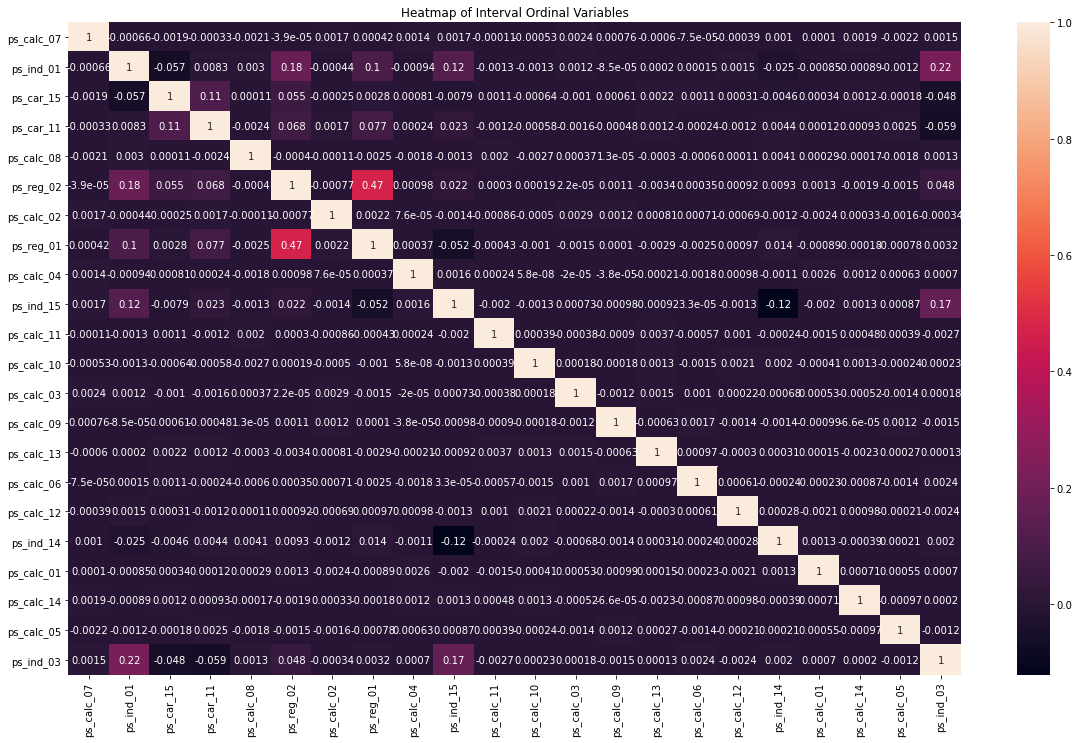

In [43]:
plt.figure(figsize=(20, 12))
sns.heatmap(df[interval_ordinal].corr(), annot=True)
plt.title('Heatmap of Interval Ordinal Variables')
plt.show()

#### Correlation Inference
1. ps_reg_01 is correlated with ps_reg_02

### 15. What's the level of correlation among ordinal features?

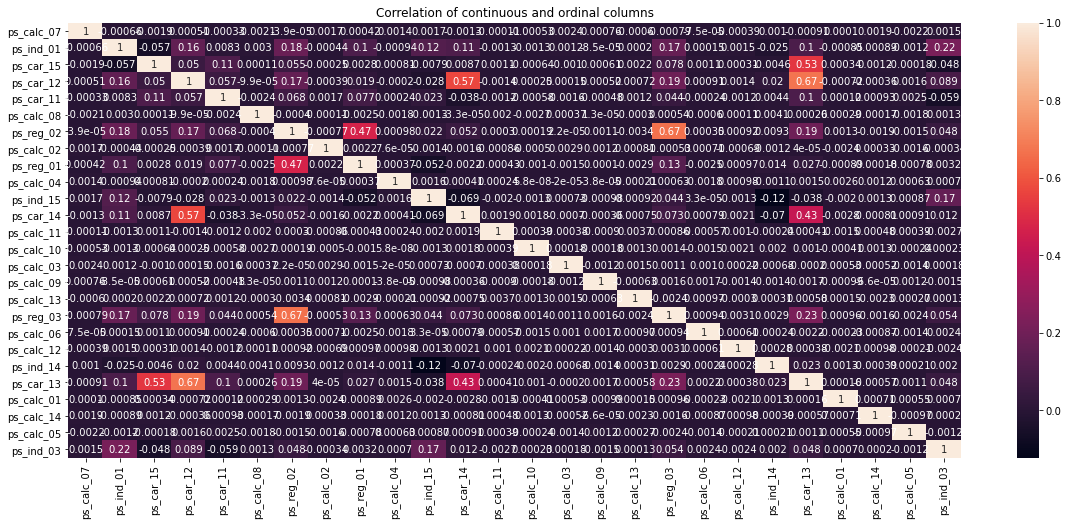

In [44]:
plt.figure(figsize=(20,8))
sns.heatmap(df[continious_ordinal_columns].corr(), annot=True)
plt.title('Correlation of continuous and ordinal columns')
plt.show()

#### Correlation Inference
1. ps_reg_01 is correlated with ps_reg_03
2. ps_reg_01 is correlated with ps_reg_02
3. ps_reg_03 is correlated with ps_reg_02
4. ps_car_13 is correalted with ps_car_15
5. ps_car_13 is correalted with ps_car_12


### 16. Implement Hot Encoding for categorical features

In [72]:
def one_hot_encoder(data_frame, columns):
    print(f'Shape of the dataframe: {data_frame.shape}')
    for col in categorical_columns:
        ohe = OneHotEncoder(sparse=False)
        data_frame = pd.concat([data_frame, pd.DataFrame(ohe.fit_transform(data_frame[[col]]), index = data_frame.index)], axis=1)
        data_frame.drop(columns=[col], inplace=True)
    return data_frame

In [74]:
# Applying transformations on copy of dataframe
df_copy = df.copy()

df_copy = one_hot_encoder(df_copy, categorical_columns)
#df_sampled = one_hot_encoder(df_sampled, categorical_columns)


Shape of the dataframe: (595212, 58)


### 17. In nominal and interval features, which features are suitable for StandardScaler? 

Analyzing boxplot to find which needs to be scaled

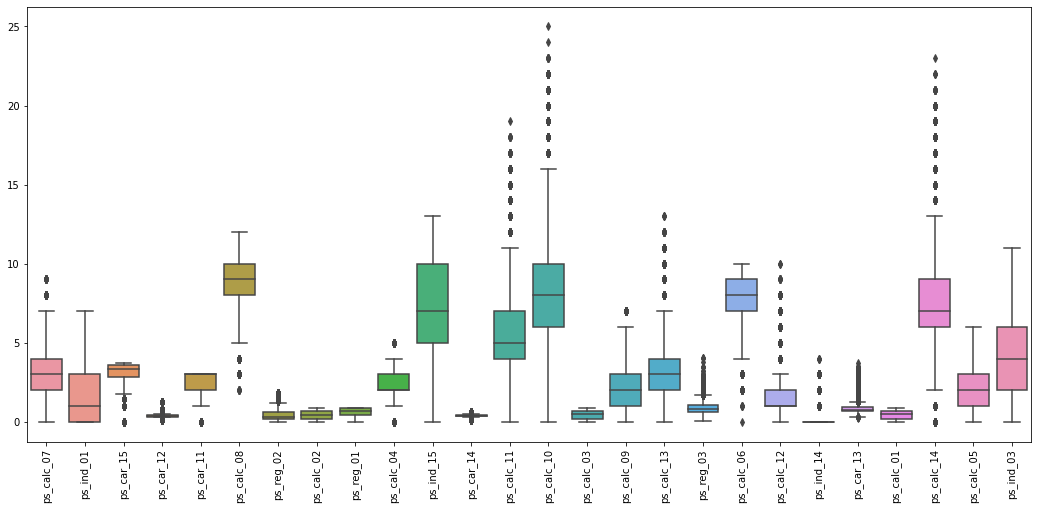

In [46]:
# Box plot for continuous ordinal columns
plt.figure(figsize=(18,8))
sns.boxplot(data=df[continious_ordinal_columns], )
plt.xticks(rotation=90)
plt.show()

We could apply standard scaler for the features where max value is >5

In [75]:
def min_max_scaler(data_frame, columns):
    for col in columns:
        if col in data_frame.columns:
            mms = MinMaxScaler()
            data_frame[col] = mms.fit_transform(data_frame[[col]])
    return data_frame

In [76]:
df_scaled = df_copy.copy()

df_scaled = min_max_scaler(df_scaled, continious_ordinal_columns)
df_sampled = min_max_scaler(df_sampled, continious_ordinal_columns)

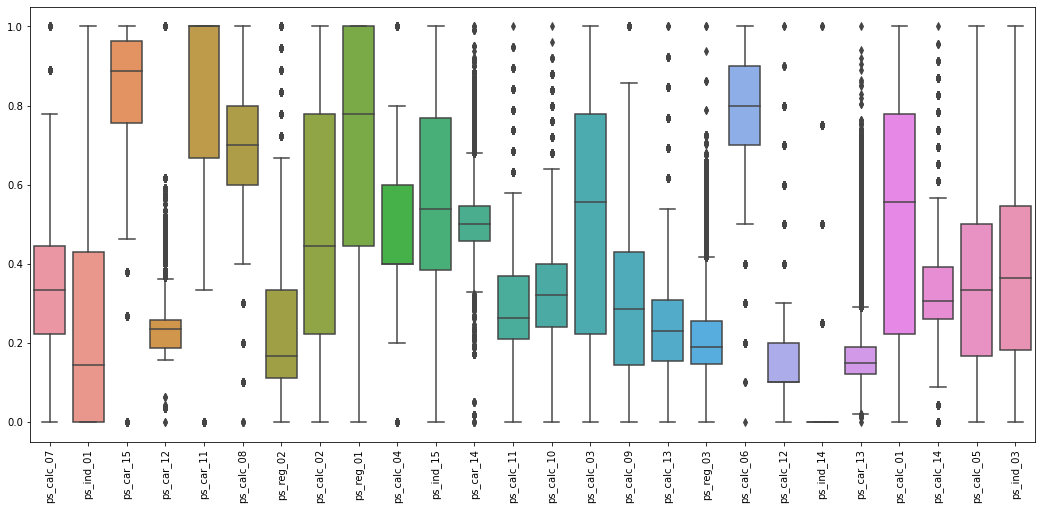

In [48]:
# Box plot for continuous ordinal columns
plt.figure(figsize=(18,8))
sns.boxplot(data=df_scaled[continious_ordinal_columns], )
plt.xticks(rotation=90)
plt.show()

In [53]:
df_scaled.head(10)

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,...,94,95,96,97,98,99,100,101,102,103
id,,,,,,,,,,,,,,,,,,,,,
7,0,0.285714,0.454545,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.142857,0.636364,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0,0.714286,0.818182,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0,0.000000,0.181818,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,0,0.000000,0.000000,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0,0.714286,0.363636,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,0,0.285714,0.272727,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22,0,0.714286,0.363636,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0,0.714286,0.272727,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


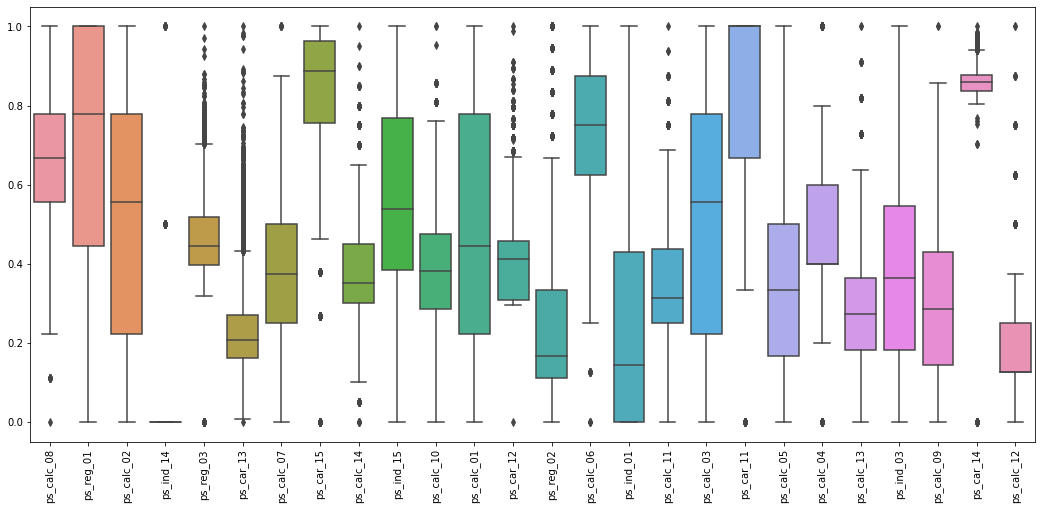

In [110]:
plt.figure(figsize=(18,8))
sns.boxplot(data=test_df, )
plt.xticks(rotation=90)
plt.show()

### 18. Summarize the learnings of ED

1. There are many columns which are correlated
2. There is one categorical column which is having huge range of values compared to other columns
3. Data is not uniformly distribute for most of the variables
4. Data is highly imbalanced 
    0 - 96.5%
    1 - 3.5%

# 2. Machine Learning Modeling:

### 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

In [264]:
def logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print(f'Shape of X_train: {X_train.shape}')
    print(f'Shape of y_train: {y_train.shape}')
    print(f'Shape of X_test: {X_test.shape}')
    print(f'Shape of y_test: {y_test.shape}')
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('')
    print('Confusion Matirix')
    print(confusion_matrix(y_test, y_pred))
    
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    return np.round(accuracy_score(y_pred, y_test), 3), np.round(f1_score(y_pred, y_test), 3)

In [265]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

#print(f'Shape of X: {X.shape}')
#print(f'Shape of y: {y.shape}')

a, f = logistic_regression(X, y)

Shape of X_train: (476169, 57)
Shape of y_train: (476169,)
Shape of X_test: (119043, 57)
Shape of y_test: (119043,)

Confusion Matirix
[[114658      0]
 [  4385      0]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



In [266]:
logistic_regression_unbalanced = {'Model': 'Logistic Regression:Unbalanced', 'accuracy':None,'f1-score':None}
logistic_regression_unbalanced['accuracy'], logistic_regression_unbalanced['f1-score'] = a, f
logistic_regression_unbalanced

{'Model': 'Logistic Regression:Unbalanced', 'accuracy': 0.963, 'f1-score': 0.0}

### 2. Why do you think f1-score is 0.0? 

- f1-score is 0.0 due to high data imbalance, we need to rebalance the data and model again
- Also precision and recall is also 0

### 3. What is the precision and recall score for the model?

- precision is 0 and recall is also 0

### 4. What is the most important inference you can draw from the result?


- Support for 1 is lower compared to 0

In [267]:
X = df_sampled.iloc[:, :-1]
y = df_sampled.iloc[:, -1]

a, f = logistic_regression(X, y)

Shape of X_train: (596458, 57)
Shape of y_train: (596458,)
Shape of X_test: (149115, 57)
Shape of y_test: (149115,)

Confusion Matirix
[[111577   3267]
 [ 11816  22455]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    114844
           1       0.87      0.66      0.75     34271

    accuracy                           0.90    149115
   macro avg       0.89      0.81      0.84    149115
weighted avg       0.90      0.90      0.89    149115



In [268]:
logistic_regression_balanced = {'Model': 'Logistic Regression:Balanced', 'accuracy':None,'f1-score':None}
logistic_regression_balanced['accuracy'], logistic_regression_balanced['f1-score'] = a, f
logistic_regression_balanced

{'Model': 'Logistic Regression:Balanced', 'accuracy': 0.899, 'f1-score': 0.749}

### 5. What is the accuracy score and f1-score for the improved Logistic Regression model? 

In [269]:
def improved_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print(f'Shape of X_train: {X_train.shape}')
    print(f'Shape of y_train: {y_train.shape}')
    print(f'Shape of X_test: {X_test.shape}')
    print(f'Shape of y_test: {y_test.shape}')
    
    param_grid = {
        'max_iter': [20, 50, 100, 200, 500, 1000],                      
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
        'class_weight': ['balanced']                                    
    }
    
    
    model = LogisticRegression()
    #cv = KFold(n_splits=10)
    grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy', verbose=10)
    grid_search_result = grid_search_cv.fit(X_train, y_train)
    
    print(f'Best {grid_search_result.best_score_} using {grid_search_result.best_params_}')
    
    
    y_pred = grid_search_cv.best_estimator_.predict(X_test)
    
    print('')
    print('Confusion Matirix')
    print(confusion_matrix(y_test, y_pred))
    
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    return np.round(accuracy_score(y_pred, y_test), 3), np.round(f1_score(y_pred, y_test), 3)

In [270]:
sample_df = df.sample(10000, random_state=42)
X = sample_df.iloc[:, 1:]
y = sample_df.iloc[:, 0]

accuracy, f1_score = improved_logistic_regression(X,y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


Best 0.774875 using {'class_weight': 'balanced', 'max_iter': 500, 'solver': 'sag'}

Confusion Matirix
[[1708  219]
 [  64    9]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1927
           1       0.04      0.12      0.06        73

    accuracy                           0.86      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.93      0.86      0.89      2000



In [271]:
logistic_regression_cv_unbalanced = {'Model': 'Logistic Regression CV:Unbalanced', 'accuracy':None,'f1-score':None}
logistic_regression_cv_unbalanced['accuracy'], logistic_regression_cv_unbalanced['f1-score'] = accuracy, f1_score
logistic_regression_cv_unbalanced

{'Model': 'Logistic Regression CV:Unbalanced',
 'accuracy': 0.858,
 'f1-score': 0.06}

In [274]:
sample_df = df_sampled.sample(10000, random_state=42)
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]

a, f = improved_logistic_regression(X,y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished


Best 0.88125 using {'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}

Confusion Matirix
[[1376  144]
 [ 113  367]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1520
           1       0.72      0.76      0.74       480

    accuracy                           0.87      2000
   macro avg       0.82      0.83      0.83      2000
weighted avg       0.87      0.87      0.87      2000



In [275]:
logistic_regression_cv_balanced = {'Model': 'Logistic Regression CV:Balanced', 'accuracy':None,'f1-score':None}
logistic_regression_cv_balanced['accuracy'], logistic_regression_cv_balanced['f1-score'] = a, f
logistic_regression_cv_balanced

{'Model': 'Logistic Regression CV:Balanced',
 'accuracy': 0.872,
 'f1-score': 0.741}

Ans: Accuracy and f1-score for the improved Logistic Regression is 0.91 and 0.78 

### 6. Why do you think f1-score has improved? 

Ans: f1-score has improved because of rebalancing the target variable to its minimum level

### 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement

In [237]:
def improved_linear_svc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print(f'Shape of X_train: {X_train.shape}')
    print(f'Shape of y_train: {y_train.shape}')
    print(f'Shape of X_test: {X_test.shape}')
    print(f'Shape of y_test: {y_test.shape}')
    
    param_grid = {
        'max_iter': [20, 50, 100, 200, 500, 1000],                      
        'dual': [True, False],   
        'class_weight': ['balanced']                                    
    }
    
    
    model = LinearSVC()
    #cv = KFold(n_splits=10)
    grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy', verbose=10)
    grid_search_result = grid_search_cv.fit(X_train, y_train)
    
    print(f'Best {grid_search_result.best_score_} using {grid_search_result.best_params_}')
    
    
    y_pred = grid_search_cv.best_estimator_.predict(X_test)
    
    print('')
    print('Confusion Matirix')
    print(confusion_matrix(y_test, y_pred))
    
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    return np.round(accuracy_score(y_pred, y_test), 3), np.round(f1_score(y_pred, y_test), 3)

In [277]:
sample_df = df_sampled.sample(10000, random_state=42)
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]

a, f = improved_linear_svc(X,y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1280s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3751s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.6s finished


Best 0.8953749999999999 using {'class_weight': 'balanced', 'dual': True, 'max_iter': 1000}

Confusion Matirix
[[1509   11]
 [ 213  267]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1520
           1       0.96      0.56      0.70       480

    accuracy                           0.89      2000
   macro avg       0.92      0.77      0.82      2000
weighted avg       0.90      0.89      0.88      2000



In [278]:
linear_svc_balanced = {'Model': 'Linear SVC:Balanced', 'accuracy':None,'f1-score':None}
linear_svc_balanced['accuracy'], linear_svc_balanced['f1-score'] = a, f
linear_svc_balanced

{'Model': 'Linear SVC:Balanced', 'accuracy': 0.888, 'f1-score': 0.704}

Ans: There isn't much improvenent in for the SVC model

### 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores? 

Ans: There is no imrovement in f1-score

In [281]:
def xgboost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print(f'Shape of X_train: {X_train.shape}')
    print(f'Shape of y_train: {y_train.shape}')
    print(f'Shape of X_test: {X_test.shape}')
    print(f'Shape of y_test: {y_test.shape}')
    
    param_grid = {
        'max_iter': [20, 50, 100, 200, 500, 1000],                      
        'dual': [True, False],   
        'class_weight': ['balanced']                                    
    }
    
    counter = Counter(y)
    estimate = counter[0] / counter[1]
    model = xgb.XGBClassifier()
    #model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
    #            max_depth = 50, alpha = 10, n_estimators = 100, scale_pos_weight = estimate)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('')
    print('Confusion Matirix')
    print(confusion_matrix(y_test, y_pred))
    
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    return np.round(accuracy_score(y_pred, y_test), 3), np.round(f1_score(y_pred, y_test), 3)

In [239]:
def adaboost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print(f'Shape of X_train: {X_train.shape}')
    print(f'Shape of y_train: {y_train.shape}')
    print(f'Shape of X_test: {X_test.shape}')
    print(f'Shape of y_test: {y_test.shape}')
    
    counter = Counter(y)
    estimate = counter[0] / counter[1]
    
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('')
    print('Confusion Matirix')
    print(confusion_matrix(y_test, y_pred))
    
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    return np.round(accuracy_score(y_pred, y_test), 3), np.round(f1_score(y_pred, y_test), 3)

In [282]:
sample_df = df_sampled.sample(10000, random_state=42)
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]

a, f = xgboost(X,y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)
[09:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Confusion Matirix
[[1519    1]
 [  80  400]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1520
           1       1.00      0.83      0.91       480

    accuracy                           0.96      2000
   macro avg       0.97      0.92      0.94      2000
weighted avg       0.96      0.96      0.96      2000



In [283]:
xgboost_balanced = {'Model': 'XGBoost:Balanced', 'accuracy':None,'f1-score':None}
xgboost_balanced['accuracy'], xgboost_balanced['f1-score'] = a, f
xgboost_balanced

{'Model': 'XGBoost:Balanced', 'accuracy': 0.96, 'f1-score': 0.908}

### 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

Ans: XGBoost came out to be the best classifiers as of now

### 10. What is the increase in number of features after one-hot encoding of the data? 

In [284]:
df_scaled.columns.values[44:].shape[0]

175

Ans: The increase in number of features after one-hot encoding is 175, We don't require to encode the data once again as it is already done.

### 11. Modelling with encoded data

In [285]:
# Using Logistic Regression
X = df_scaled.iloc[:, 1:]
y = df_scaled.iloc[:, 0]

a, f = logistic_regression(X, y)

Shape of X_train: (476169, 218)
Shape of y_train: (476169,)
Shape of X_test: (119043, 218)
Shape of y_test: (119043,)

Confusion Matirix
[[114658      0]
 [  4385      0]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



In [286]:
logistic_regression_encoded = {'Model': 'Logistic Regression Encoded:UnBalanced', 'accuracy':None,'f1-score':None}
logistic_regression_encoded['accuracy'], logistic_regression_encoded['f1-score'] = a, f
logistic_regression_encoded

{'Model': 'Logistic Regression Encoded:UnBalanced',
 'accuracy': 0.963,
 'f1-score': 0.0}

In [288]:
# using Improved Logistic Regression
sample_df = df_scaled.sample(10000, random_state=42)
X = sample_df.iloc[:, 1:]
y = sample_df.iloc[:, 0]
a, f = improved_logistic_regression(X, y)

Shape of X_train: (8000, 218)
Shape of y_train: (8000,)
Shape of X_test: (2000, 218)
Shape of y_test: (2000,)
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.2min finished


Best 0.81425 using {'class_weight': 'balanced', 'max_iter': 200, 'solver': 'saga'}

Confusion Matirix
[[1673  254]
 [  52   21]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1927
           1       0.08      0.29      0.12        73

    accuracy                           0.85      2000
   macro avg       0.52      0.58      0.52      2000
weighted avg       0.94      0.85      0.89      2000



In [292]:
logistic_regression_cv_encoded = {'Model': 'Logistic Regression CV Encoded:UnBalanced', 'accuracy':None,'f1-score':None}
logistic_regression_cv_encoded['accuracy'], logistic_regression_cv_encoded['f1-score'] = a, f
logistic_regression_cv_encoded

{'Model': 'Logistic Regression CV Encoded:UnBalanced',
 'accuracy': 0.847,
 'f1-score': 0.121}

In [293]:
# using Linear SVC
sample_df = df_scaled.sample(10000, random_state=42)
X = sample_df.iloc[:, 1:]
y = sample_df.iloc[:, 0]

a, f = improved_linear_svc(X, y)

Shape of X_train: (8000, 218)
Shape of y_train: (8000,)
Shape of X_test: (2000, 218)
Shape of y_test: (2000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.4s finished


Best 0.957625 using {'class_weight': 'balanced', 'dual': True, 'max_iter': 20}

Confusion Matirix
[[1926    1]
 [  72    1]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1927
           1       0.50      0.01      0.03        73

    accuracy                           0.96      2000
   macro avg       0.73      0.51      0.50      2000
weighted avg       0.95      0.96      0.95      2000



In [294]:
linear_svc_cv_encoded = {'Model': 'Linear SVC CV Encoded:UnBalanced', 'accuracy':None,'f1-score':None}
linear_svc_cv_encoded['accuracy'], linear_svc_cv_encoded['f1-score'] = a, f
linear_svc_cv_encoded

{'Model': 'Linear SVC CV Encoded:UnBalanced',
 'accuracy': 0.964,
 'f1-score': 0.027}

### Model without balancing 

In [297]:
# using XGBoost
df_sample = df_scaled.sample(10000, random_state=42)
X = df_sample.iloc[:, 1:]
y = df_sample.iloc[:, 0]
X.columns = range(len(X.columns))
a, f = xgboost(X, y)

Shape of X_train: (8000, 218)
Shape of y_train: (8000,)
Shape of X_test: (2000, 218)
Shape of y_test: (2000,)
[09:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Confusion Matirix
[[1925    2]
 [  73    0]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1927
           1       0.00      0.00      0.00        73

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.96      0.95      2000



In [298]:
xgboost_unbalanced = {'Model': 'XgBoost:UnBalanced', 'accuracy':None,'f1-score':None}
xgboost_unbalanced['accuracy'], xgboost_unbalanced['f1-score'] = a, f
xgboost_unbalanced

{'Model': 'XgBoost:UnBalanced', 'accuracy': 0.962, 'f1-score': 0.0}

### Model with balancing

In [299]:
# using XGBoost
sample_df = df_sampled.sample(10000, random_state=42)
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]
#X.columns = range(len(X.columns))
a, f = xgboost(X, y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)
[09:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Confusion Matirix
[[1519    1]
 [  80  400]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1520
           1       1.00      0.83      0.91       480

    accuracy                           0.96      2000
   macro avg       0.97      0.92      0.94      2000
weighted avg       0.96      0.96      0.96      2000



In [300]:
xgboost_balanced_2 = {'Model': 'XgBoost 2:Balanced', 'accuracy':None,'f1-score':None}
xgboost_balanced_2['accuracy'], xgboost_balanced_2['f1-score'] = a, f
xgboost_balanced_2

{'Model': 'XgBoost 2:Balanced', 'accuracy': 0.96, 'f1-score': 0.908}

### 11. Is there any improvement in scores after encoding?

Ans: From the above results, there is no improvement in scores after encodings

### 12. If not missing a positive sample is the priority which model is best so far?

Ans: XGBoost is the best so far

### 3. If not marking negative sample as positive is top priority, which model is best so far? 

Ans: XGBoost is the best so far

### 14. Analysing AdaBoost model

In [301]:
# using AdaBoost
sample_df = df_sampled.sample(10000, random_state=42)
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]
a, f = adaboost(X,y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)

Confusion Matirix
[[1509   11]
 [ 112  368]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1520
           1       0.97      0.77      0.86       480

    accuracy                           0.94      2000
   macro avg       0.95      0.88      0.91      2000
weighted avg       0.94      0.94      0.94      2000



In [302]:
ada_boost_balanced = {'Model': 'AdaBoost:Balanced', 'accuracy':None,'f1-score':None}
ada_boost_balanced['accuracy'], ada_boost_balanced['f1-score'] = a, f
ada_boost_balanced

{'Model': 'AdaBoost:Balanced', 'accuracy': 0.938, 'f1-score': 0.857}

### 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

Ans: Adaboost didn't gave any significant improvements over XGBoost

### 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

In [303]:
def mlp_clasifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print(f'Shape of X_train: {X_train.shape}')
    print(f'Shape of y_train: {y_train.shape}')
    print(f'Shape of X_test: {X_test.shape}')
    print(f'Shape of y_test: {y_test.shape}')
    
    
    param_grid = {
        'hidden_layer_sizes': [(10),(20), (10, 10), (20, 20), (100, 100)],                      
        'activation': ['relu', 'logistic']                             
    }
    
    
    model = MLPClassifier()
    grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='f1', verbose=10)
    grid_search_result = grid_search_cv.fit(X_train, y_train)
    
    print(f'Best {grid_search_result.best_score_} using {grid_search_result.best_params_}')
    
    
    y_pred = grid_search_cv.best_estimator_.predict(X_test)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('')
    print('Confusion Matirix')
    print(confusion_matrix(y_test, y_pred))
    
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    return np.round(accuracy_score(y_pred, y_test), 3), np.round(f1_score(y_pred, y_test), 3)

In [304]:
sample_df = df_sampled.sample(10000, random_state=42)
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]

a, f = mlp_clasifier(X, y)

Shape of X_train: (8000, 57)
Shape of y_train: (8000,)
Shape of X_test: (2000, 57)
Shape of y_test: (2000,)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Best 0.7750932253555948 using {'activation': 'logistic', 'hidden_layer_sizes': (100, 100)}

Confusion Matirix
[[1469   51]
 [ 159  321]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1520
           1       0.86      0.67      0.75       480

    accuracy                           0.90      2000
   macro avg       0.88      0.82      0.84      2000
weighted avg       0.89      0.90      0.89      2000



In [305]:
mlp_classfier_balanced = {'Model': 'MLPClassifier:Balanced', 'accuracy':None,'f1-score':None}
mlp_classfier_balanced['accuracy'], mlp_classfier_balanced['f1-score'] = a, f
mlp_classfier_balanced

{'Model': 'MLPClassifier:Balanced', 'accuracy': 0.895, 'f1-score': 0.754}

Ans: We got the best f1-score for the hidden_layer_sizes : (10)

# Project report/synopsis

In [311]:
models = [logistic_regression_unbalanced, 
          logistic_regression_balanced, 
          logistic_regression_cv_balanced, 
          logistic_regression_cv_unbalanced,
          linear_svc_balanced,
         linear_svc_cv_encoded,
         xgboost_balanced,
         ada_boost_balanced]

pd.DataFrame(models).sort_values(by=['f1-score'], ascending=False)

,Model,accuracy,f1-score
6,XGBoost:Balanced,0.960,0.908
7,AdaBoost:Balanced,0.938,0.857
1,Logistic Regression:Balanced,0.899,0.749
2,Logistic Regression CV:Balanced,0.872,0.741
4,Linear SVC:Balanced,0.888,0.704
3,Logistic Regression CV:Unbalanced,0.858,0.060
5,Linear SVC CV Encoded:UnBalanced,0.964,0.027
0,Logistic Regression:Unbalanced,0.963,0.000


XGBoost came out as best machine learning model with f1 and accuracy scores